In [1]:
## ----------------------------------- bulk RNAseq analysis for yeast ------------------------------ ##

# The data consists of 3 different parts, here we focus only on the 3rd round, meaning 3rd dataset. #

# importing needed packages #
import pandas as pd
import numpy as np
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import anndata as ad
import logging

In [2]:
# data 2 ---> I tried this because I wanted to reproduce the results from Vineesh,
#  but had issues reading the 1st dataset to python. As both datasets are merged for the preprocessing and analysis
# I decicded to do the analysis with the 3. dataset directly

### loading data + slight preprocessing ###

"""#filepath
file_path_2 = "/Users/kimjob/PhD/PhD/RNA_Seq_Novogene/round2/Gene_Counts(gene_count).csv"

# Load the CSV file with a semicolon as the separator <-- only this works for correctly uploading the csv file !!
data_2 = pd.read_csv(file_path_2, header=0, sep=";")

Data2 = pd.DataFrame(data_2) #create dataframe
print(Data2) 

### selecting reads (total + mitochondiral ) ###

# QC (quality control) ROUND 2 data, see how many mitochondiral genes per total mapped reads there are. 

mit_genes_2 = Data2[Data2['gene_chr']=='Mito']

metadata_columns_2 = ['gene_id', 'gene_name', 'gene_chr', 'gene_start', 'gene_end', 
                    'gene_strand', 'gene_length', 'gene_biotype', 'gene_description', 'Family'] # additional columns, explaining metadata of samples

sample_columns_2 = [col for col in Data2.columns if col not in metadata_columns_2] # all the samples

tot_mapped_reads_2 = Data2[sample_columns_2].sum() # takes the sum of all genes per sample

mit_reads_2 =  mit_genes_2[sample_columns_2].sum() # mitochondrial genes

#mit_reads = np.log10(mit_reads) # log10 of the sum
#tot_mapped_reads = np.log10(tot_mapped_reads) # log10 of the sum

frac_mit_2 = mit_reads_2/tot_mapped_reads_2 # fraction of mitochondrial genes vs total genes

### plotting ###

plt.figure(figsize=(10, 6))
plt.scatter(np.log10(tot_mapped_reads_2), frac_mit_2, alpha=0.7) # take log10 from total reads
plt.title('Round 2: Fraction of mitochondrial genes vs. total genes', fontsize=14)
plt.xlabel('log10(tot_mapped_reads)', fontsize=12)
plt.ylabel('fraction of mitochondiral genes', fontsize=12)
plt.show()
"""


'#filepath\nfile_path_2 = "/Users/kimjob/PhD/PhD/RNA_Seq_Novogene/round2/Gene_Counts(gene_count).csv"\n\n# Load the CSV file with a semicolon as the separator <-- only this works for correctly uploading the csv file !!\ndata_2 = pd.read_csv(file_path_2, header=0, sep=";")\n\nData2 = pd.DataFrame(data_2) #create dataframe\nprint(Data2) \n\n### selecting reads (total + mitochondiral ) ###\n\n# QC (quality control) ROUND 2 data, see how many mitochondiral genes per total mapped reads there are. \n\nmit_genes_2 = Data2[Data2[\'gene_chr\']==\'Mito\']\n\nmetadata_columns_2 = [\'gene_id\', \'gene_name\', \'gene_chr\', \'gene_start\', \'gene_end\', \n                    \'gene_strand\', \'gene_length\', \'gene_biotype\', \'gene_description\', \'Family\'] # additional columns, explaining metadata of samples\n\nsample_columns_2 = [col for col in Data2.columns if col not in metadata_columns_2] # all the samples\n\ntot_mapped_reads_2 = Data2[sample_columns_2].sum() # takes the sum of all genes per

        gene_id  MMY116_2c_r7  ASY59_4_r7  AFY98_1_r7  AFY98_2_r7  AFY57_r7  \
0      21S_rRNA       2084300     2409119     2109305     1966829   2243887   
1          SCR1       2485426     2171237     1975830     1978023   1917557   
2      15S_rRNA        515939      694078      557050      501592    602723   
3         Q0050        417638      482584      551982      412075    518274   
4         Q0055        372428      428264      447110      362130    432917   
...         ...           ...         ...         ...         ...       ...   
7121  YAL067W-A             0           0           0           0         0   
7122    YAR047C             0           0           0           0         0   
7123    YAR060C             0           0           0           0         0   
7124    YAR061W             0           0           0           0         0   
7125      Q0297             0           0           0           0         0   

      AFY101_2_r7  AFY102_r7  AFY074_r7  MMY116_2c_

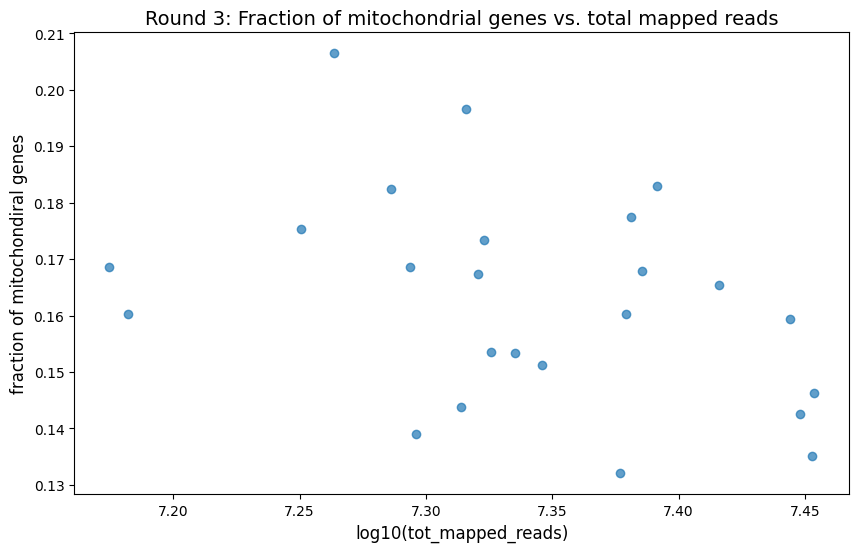

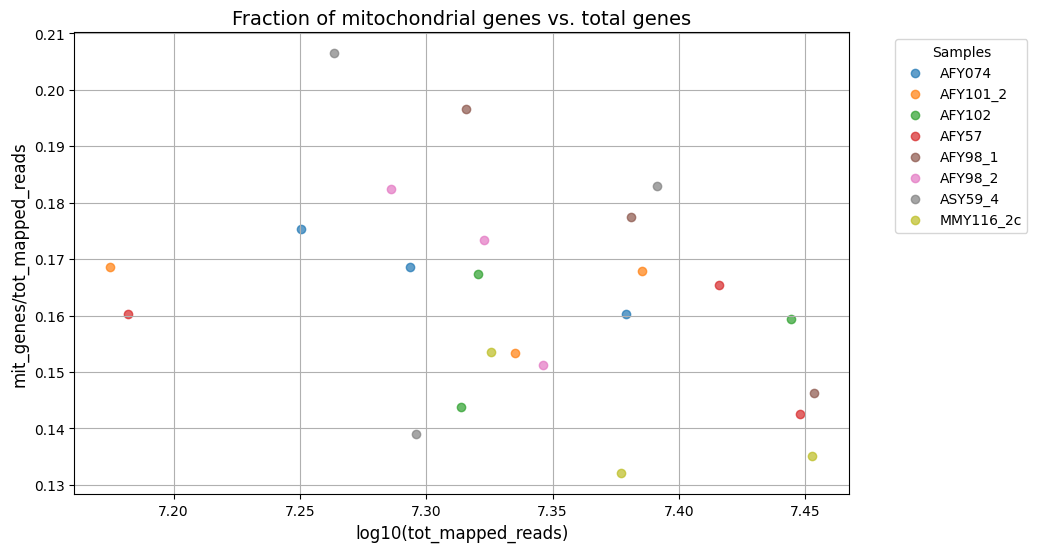

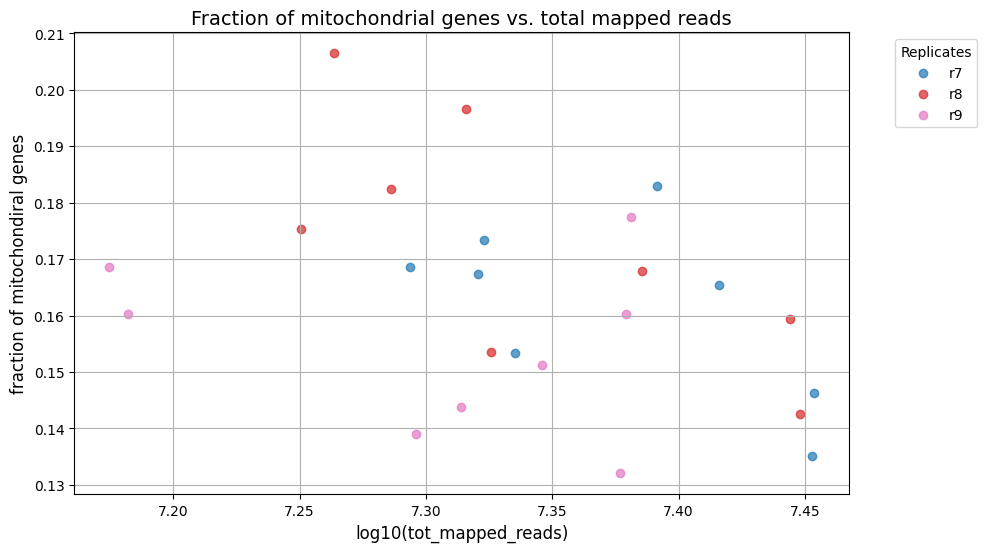

In [3]:
## Start of analysis ##

### ------------------------------------- Preprocessing (Quality Control)  --------------------------------------------- ###



## ------- loading data + slight preprocessing ------- ##

#filepath
file_path_3 = "/Users/kimjob/PhD/PhD/RNA_Seq_Novogene/round3/gene_count.csv"

# Load the CSV file with a semicolon as the separator 
data_3 = pd.read_csv(file_path_3, header=0, sep=";")

Data3 = pd.DataFrame(data_3) #create dataframe
print(Data3) 

# selecting reads (total + mitochondiral ) #

# QC (quality control) ROUND 3 data, see how many mitochondiral genes per total mapped reads there are. 

mit_genes_3 = Data3[Data3['gene_chr']=='Mito']

protein_coding_genes_3 = Data3[Data3['gene_chr']=='protein_coding']

metadata_columns_3 = ['gene_id', 'gene_name', 'gene_chr', 'gene_start', 'gene_end', 
                    'gene_strand', 'gene_length', 'gene_biotype', 'gene_description', 'Family'] # additional columns, explaining metadata of samples

sample_columns_3 = [col for col in Data3.columns if col not in metadata_columns_3] # all the samples

tot_mapped_reads_3 = Data3[sample_columns_3].sum() # takes the sum of all genes per sample

mit_reads_3 =  mit_genes_3[sample_columns_3].sum() # mitochondrial genes
protein_coding_reads_3 = protein_coding_genes_3[sample_columns_3].sum()

#mit_reads = np.log10(mit_reads) # log10 of the sum
#tot_mapped_reads = np.log10(tot_mapped_reads) # log10 of the sum

frac_mit_3 = mit_reads_3/tot_mapped_reads_3 # fraction of mitochondrial genes vs total genes

### plotting ###

plt.figure(figsize=(10, 6))
plt.scatter(np.log10(tot_mapped_reads_3), frac_mit_3, alpha=0.7) # take log10 from total reads
plt.title('Round 3: Fraction of mitochondrial genes vs. total mapped reads', fontsize=14)
plt.xlabel('log10(tot_mapped_reads)', fontsize=12)
plt.ylabel('fraction of mitochondiral genes', fontsize=12)
plt.show()


### specifying the replicates ###

# replicates (1-9)

rep_1 = ["ASY20_r1","ASY46_r1","AFY3_r1","AFY25_r1","MMY116_2c_r1","ASY59_4_r1","AFY57_r1","AFY55_5_r1"]
rep_2 = ["ASY20_r2","ASY46_r2","AFY3_r2","AFY25_r2","MMY116_2c_r2","ASY59_4_r2","AFY57_r2","AFY55_5_r2"]
rep_3 = ["ASY20_r3","ASY46_r3","AFY3_r3","AFY25_r3","MMY116_2c_r3","AFY57_r3","AFY55_5_r3"]
rep_4 = ["ASY20_r4","ASY46_r4","AFY3_r4","MMY116_2c_r4","ASY59_4_r4","AFY57_r4"]
rep_5 = ["ASY20_r5","ASY46_r5","AFY3_r5","MMY116_2c_r5","ASY59_4_r5","AFY57_r5"]
rep_6 = ["ASY59_4_r6","AFY57_r6"]
rep_7 = ["MMY116_2c_r7","ASY59_4_r7","AFY98_1_r7","AFY98_2_r7","AFY57_r7","AFY101_2_r7","AFY102_r7","AFY074_r7"]
rep_8 = ["MMY116_2c_r8","ASY59_4_r8","AFY98_1_r8","AFY98_2_r8","AFY57_r8","AFY101_2_r8","AFY102_r8","AFY074_r8"]
rep_9 = ["MMY116_2c_r9","ASY59_4_r9","AFY98_1_r9","AFY98_2_r9","AFY57_r9","AFY101_2_r9","AFY102_r9","AFY074_r9"]


type = [col.split('_r')[0] for col in sample_columns_3]
replicates = [f"_r{col.split('_r')[1]}" for col in sample_columns_3] # define replicates in dataset 3

'''unique_samples = list(set(type))
unique_replicates = list(set(replicates))
'''
# a little bit preprocessing for plotting #

# Create unique color mappings for samples and replicates
unique_samples = sorted(set(type))  # Unique sample names
unique_replicates = sorted(set(replicates))  # Unique replicate IDs

sample_colors = {sample: plt.cm.tab10(i / len(unique_samples)) for i, sample in enumerate(unique_samples)}
replicate_colors = {rep: plt.cm.tab10(i / len(unique_replicates)) for i, rep in enumerate(unique_replicates)}

# Assign colors for each data point
sample_color_map = [sample_colors[sample] for sample in type]
replicate_color_map = [replicate_colors[rep] for rep in replicates]


#
# Plot color-coded by sample
plt.figure(figsize=(10, 6))
for sample, color in sample_colors.items():
    # Select points for this sample
    indices = [i for i, s in enumerate(type) if s == sample]
    plt.scatter(np.log10(tot_mapped_reads_3[indices]), frac_mit_3[indices], alpha=0.7, label=sample, color=color)

#loop for assigning color to sample group
plt.title('Fraction of mitochondrial genes vs. total genes', fontsize=14)
plt.xlabel('log10(tot_mapped_reads)', fontsize=12)
plt.ylabel('mit_genes/tot_mapped_reads', fontsize=12)
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid()
plt.show()

# Plot color-coded by replicate
plt.figure(figsize=(10, 6))
#loop for assigning color to replicate group
for replicate, color in replicate_colors.items():
    # Select points for this replicate
    indices = [i for i, r in enumerate(replicates) if r == replicate]
    x_values = np.log10(tot_mapped_reads_3[indices])
    y_values = frac_mit_3[indices]
 
    plt.scatter(np.log10(tot_mapped_reads_3[indices]), frac_mit_3[indices], alpha=0.7, label=replicate.split('_')[1], color=color)
        
    '''# Annotate each point with its coordinates
    for x, y in zip(x_values, y_values):
        plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')  # Adjust fontsize and alignment as needed
    '''

plt.title('Fraction of mitochondrial genes vs. total mapped reads', fontsize=14)
plt.xlabel('log10(tot_mapped_reads)', fontsize=12)
plt.ylabel('fraction of mitochondiral genes', fontsize=12)
plt.legend(title="Replicates", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid()
plt.show()



In [4]:
#print('round 2 fract. mitochondiral genes:',frac_mit_2.sort_values(ascending=True))
print('round 3 fract. mitochondiral genes:',frac_mit_3.sort_values(ascending=True))

round 3 fract. mitochondiral genes: MMY116_2c_r9    0.132032
MMY116_2c_r7    0.135091
ASY59_4_r9      0.139025
AFY57_r8        0.142574
AFY102_r9       0.143837
AFY98_1_r7      0.146265
AFY98_2_r9      0.151241
AFY101_2_r7     0.153405
MMY116_2c_r8    0.153481
AFY102_r8       0.159423
AFY57_r9        0.160188
AFY074_r9       0.160220
AFY57_r7        0.165478
AFY102_r7       0.167305
AFY101_2_r8     0.167916
AFY074_r7       0.168587
AFY101_2_r9     0.168648
AFY98_2_r7      0.173367
AFY074_r8       0.175299
AFY98_1_r9      0.177452
AFY98_2_r8      0.182329
ASY59_4_r7      0.182936
AFY98_1_r8      0.196612
ASY59_4_r8      0.206404
dtype: float64


df_sorted:           Sample  Mito_Genes               Group
23     AFY074_r9    0.160220  2x triple addition
15     AFY074_r8    0.175299  2x triple addition
7      AFY074_r7    0.168587  2x triple addition
19    AFY98_2_r9    0.151241     double addition
18    AFY98_1_r9    0.177452     double addition
17    ASY59_4_r9    0.139025     double addition
10    AFY98_1_r8    0.196612     double addition
9     ASY59_4_r8    0.206404     double addition
11    AFY98_2_r8    0.182329     double addition
3     AFY98_2_r7    0.173367     double addition
2     AFY98_1_r7    0.146265     double addition
1     ASY59_4_r7    0.182936     double addition
6      AFY102_r7    0.167305     triple addition
5    AFY101_2_r7    0.153405     triple addition
22     AFY102_r9    0.143837     triple addition
12      AFY57_r8    0.142574     triple addition
13   AFY101_2_r8    0.167916     triple addition
14     AFY102_r8    0.159423     triple addition
4       AFY57_r7    0.165478     triple addition
20      A

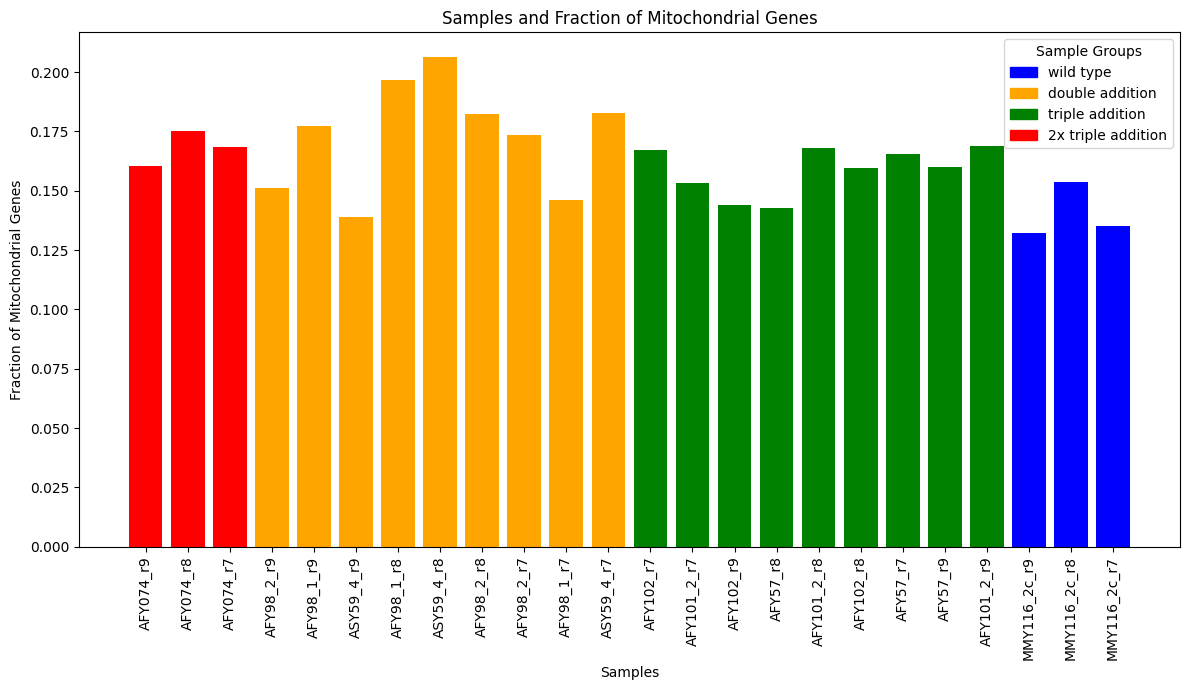

In [5]:
## create plot to see fraction of mitochondrial content per sample ##

#create list of mitochondrial genes 
mito_genes_3 = []
for i in frac_mit_3.values:
    mito_genes_3.append(i)

# different samples grouped
W_T = ['MMY116_']
double_addition = ['ASY59','AFY98_1', 'AFY98_2']
triple_addition = ['AFY57','AFY101_2','AFY102']
triple_addition_2 = ['AFY74']

group_colors = {
    'wild type': 'blue',
    'double addition': 'orange',
    'triple addition': 'green',
    '2x triple addition': 'red'
}

group_types = []

# assigning type to group

for sample in sample_columns_3:
    if sample.startswith(tuple(W_T)):
        group_types.append('wild type')
    elif sample.startswith(tuple(double_addition)):
        group_types.append('double addition')
    elif sample.startswith(tuple(triple_addition)):
        group_types.append('triple addition')
    else:
        group_types.append('2x triple addition')
   
data = {
    'Sample': sample_columns_3,
    'Mito_Genes': mito_genes_3,
    'Group': group_types
}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Group') #dataframe sorted by group

print('df_sorted:',df_sorted)

bar_colors = [group_colors[group] for group in df_sorted['Group']]

plt.figure(figsize=(12, 7))
bars = plt.bar(df_sorted['Sample'], df_sorted['Mito_Genes'], color=bar_colors)
plt.xlabel('Samples')
plt.title('Samples and Fraction of Mitochondrial Genes')
plt.xticks(rotation=90)
plt.ylabel('Fraction of Mitochondrial Genes')


handles = [plt.Rectangle((0,0),1,1, color=group_colors[group]) for group in group_colors]
plt.legend(handles, group_colors.keys(), title="Sample Groups")

plt.tight_layout()  # Adjust layout to make room for tilted labels
plt.show()


In [142]:
test_extreme = df_genes[((df_genes.drop(columns=['gene_length']) >= 200000).sum(axis=1) >= 24)]

test_extreme

,MMY116_2c_r7,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,...,AFY074_r8,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9,gene_length
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,2084300,2409119,2109305,1966829,2243887,1794912,1827925,1739482,1737263,1976315,...,1719119,1637057,1332682,2342542,1738614,1315453,1344644,1579475,2107968,3296
SCR1,2485426,2171237,1975830,1978023,1917557,1576181,1664864,1606189,1979410,1767056,...,1341720,1755967,1336757,1802324,1536353,1129264,1135663,1645968,1972435,522
15S_rRNA,515939,694078,557050,501592,602723,424241,510964,497319,455983,513483,...,432293,347345,307831,575041,412323,333995,375707,421583,553449,1649
Q0050,417638,482584,551982,412075,518274,380427,395553,386110,353717,438678,...,360289,430905,420580,471744,443415,270535,285518,320991,394290,2505
Q0055,372428,428264,447110,362130,432917,319817,338965,320500,312197,388598,...,300346,341440,341100,418242,370128,235780,234641,282476,356460,2565


In [152]:


df_genes = Data3[['gene_id'] + sample_columns_3 + ['gene_length']] # Dataframe containing genes + gene length

# filter out genes that don't fulfill criteria: Keep genes with counts > 30 in at least 3 samples

df_genes.set_index('gene_id', inplace=True)

# keep genes that have more than 30 counts in at least 3 samples, for this do not include "gene_length"
filtered_genes = df_genes[((df_genes.drop(columns=['gene_length']) >= 30).sum(axis=1) >= 3)]
filtered_genes

# example for gene "YOR225W" --> at least 3x the count 30 
"""MMY116_2c_r7     55
ASY59_4_r7       25
AFY98_1_r7       30
AFY98_2_r7       23
AFY57_r7          6
AFY101_2_r7      13
AFY102_r7        11
AFY074_r7         2
MMY116_2c_r8     33
ASY59_4_r8       17
AFY98_1_r8       11
AFY98_2_r8       23
AFY57_r8         20
AFY101_2_r8      13
AFY102_r8         2
AFY074_r8        11
MMY116_2c_r9     19
ASY59_4_r9       19
AFY98_1_r9       32
AFY98_2_r9       20
AFY57_r9          2
AFY101_2_r9       3
AFY102_r9        10
AFY074_r9         7
gene_length     330
Name: YOR225W, dtype: int64"""

,MMY116_2c_r7,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,...,AFY074_r8,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9,gene_length
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,2084300,2409119,2109305,1966829,2243887,1794912,1827925,1739482,1737263,1976315,...,1719119,1637057,1332682,2342542,1738614,1315453,1344644,1579475,2107968,3296
SCR1,2485426,2171237,1975830,1978023,1917557,1576181,1664864,1606189,1979410,1767056,...,1341720,1755967,1336757,1802324,1536353,1129264,1135663,1645968,1972435,522
15S_rRNA,515939,694078,557050,501592,602723,424241,510964,497319,455983,513483,...,432293,347345,307831,575041,412323,333995,375707,421583,553449,1649
Q0050,417638,482584,551982,412075,518274,380427,395553,386110,353717,438678,...,360289,430905,420580,471744,443415,270535,285518,320991,394290,2505
Q0055,372428,428264,447110,362130,432917,319817,338965,320500,312197,388598,...,300346,341440,341100,418242,370128,235780,234641,282476,356460,2565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR225W,55,25,30,23,6,13,11,2,33,17,...,11,19,19,32,20,2,3,10,7,330
YFL015W-A,51,16,12,29,18,31,15,13,22,14,...,11,26,22,6,8,7,4,4,13,318
YHR093W,34,9,10,43,14,12,15,7,14,18,...,9,15,17,32,17,15,10,17,15,549


In [153]:
filtered_genes.loc['YOR225W']

MMY116_2c_r7     55
ASY59_4_r7       25
AFY98_1_r7       30
AFY98_2_r7       23
AFY57_r7          6
AFY101_2_r7      13
AFY102_r7        11
AFY074_r7         2
MMY116_2c_r8     33
ASY59_4_r8       17
AFY98_1_r8       11
AFY98_2_r8       23
AFY57_r8         20
AFY101_2_r8      13
AFY102_r8         2
AFY074_r8        11
MMY116_2c_r9     19
ASY59_4_r9       19
AFY98_1_r9       32
AFY98_2_r9       20
AFY57_r9          2
AFY101_2_r9       3
AFY102_r9        10
AFY074_r9         7
gene_length     330
Name: YOR225W, dtype: int64

In [7]:
## TPM normalization ##

def read_counts2tpm_(df):
    ## convert read counts to TPM (transcripts per million) ##
    
    result = df.copy()  # create copy otherwise sample/gene names get lost
    sample_reads = result.loc[:, result.columns != 'gene_length'].copy()  # Exclude gene_length
    gene_len = result['gene_length'].values  # Extract gene lengths as a numpy array

    gene_len = pd.to_numeric(gene_len, errors='coerce') # needs to be numeric otherwise error appears

    print('gene_length:', gene_len)

    # Normalize by gene length
    
    normalize_by_genelength = sample_reads.values  * 1e3 / gene_len[:, np.newaxis]  # multiplication by 1e3 comes because (onverting to kb)
    
    print('normalize by gene length:', normalize_by_genelength)

    scaling_factor = (np.sum(normalize_by_genelength, axis=0).reshape(1, -1)) / 1e6  # Scaling factor
    print('scaling factor:', scaling_factor)
    tpm = normalize_by_genelength / scaling_factor  # Normalize sequencing depth

    tpm_df = pd.DataFrame(tpm, columns=sample_reads.columns, index=sample_reads.index)
    tpm_df["gene_length"] = result["gene_length"]

    return tpm_df


TPM_MasterCount = pd.DataFrame(read_counts2tpm_(filtered_genes))

#check if normalization is correct
print('is normalization correct:')
TPM_MasterCount.sum(axis = 0, skipna = True)

gene_length: [3296  522 1649 ...  549  354  375]
normalize by gene length: [[6.32372573e+05 7.30922027e+05 6.39959041e+05 ... 4.07962379e+05
  4.79209648e+05 6.39553398e+05]
 [4.76135249e+06 4.15945785e+06 3.78511494e+06 ... 2.17559962e+06
  3.15319540e+06 3.77861111e+06]
 [3.12879927e+05 4.20908429e+05 3.37810794e+05 ... 2.27839297e+05
  2.55659794e+05 3.35627047e+05]
 ...
 [6.19307832e+01 1.63934426e+01 1.82149362e+01 ... 1.82149362e+01
  3.09653916e+01 2.73224044e+01]
 [3.67231638e+01 2.54237288e+01 1.69491525e+01 ... 8.47457627e+00
  5.64971751e+00 2.48587571e+02]
 [5.33333333e+01 8.00000000e+01 2.93333333e+01 ... 1.60000000e+01
  3.46666667e+01 4.80000000e+01]]
scaling factor: [[27.92550473 22.90872923 26.26193333 19.96931654 24.12657392 20.36941733
  19.73435312 18.70437456 20.46966381 17.12668059 19.31012332 18.05447062
  26.65057851 22.01857483 26.08921217 16.54313477 22.5679516  18.42115528
  21.87403676 20.52805887 14.1980676  13.86675425 19.70207508 22.76911933]]
is normaliz

MMY116_2c_r7    1000000.0
ASY59_4_r7      1000000.0
AFY98_1_r7      1000000.0
AFY98_2_r7      1000000.0
AFY57_r7        1000000.0
AFY101_2_r7     1000000.0
AFY102_r7       1000000.0
AFY074_r7       1000000.0
MMY116_2c_r8    1000000.0
ASY59_4_r8      1000000.0
AFY98_1_r8      1000000.0
AFY98_2_r8      1000000.0
AFY57_r8        1000000.0
AFY101_2_r8     1000000.0
AFY102_r8       1000000.0
AFY074_r8       1000000.0
MMY116_2c_r9    1000000.0
ASY59_4_r9      1000000.0
AFY98_1_r9      1000000.0
AFY98_2_r9      1000000.0
AFY57_r9        1000000.0
AFY101_2_r9     1000000.0
AFY102_r9       1000000.0
AFY074_r9       1000000.0
gene_length     8660170.0
dtype: float64

In [8]:
## final count matrix --> tpm normalized ! #
 
TPM_MasterCount

,MMY116_2c_r7,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,...,AFY074_r8,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9,gene_length
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,22644.982750,31905.830279,24368.314134,29882.449816,28217.473440,26734.825385,28102.714712,28215.616597,25749.432223,35010.294625,...,31528.327239,22008.196568,21949.390525,32491.611042,25696.151547,28109.873621,29420.178014,24322.800822,28088.631305,3296
SCR1,170501.931373,181566.503001,144129.333292,189756.924502,152258.702597,148237.123449,161616.376142,164506.458755,185248.434731,197654.456895,...,155372.295745,149057.456119,139016.100047,157845.943479,143374.734049,152368.692488,156893.212135,160043.822227,165953.327222,522
15S_rRNA,11204.092112,18373.277065,12863.135022,15232.344184,15149.610053,12630.291561,15701.702783,16123.941188,13508.815990,18181.604896,...,15846.732972,9333.579998,10133.858460,15942.235398,12180.609519,14265.600907,16430.614718,12976.287661,14740.449193,1649
Q0050,5970.232521,8409.384103,8390.551183,8237.687937,8575.432595,7455.641141,8001.548786,8240.624570,6898.227178,10225.037895,...,8694.116692,7622.223190,9114.314769,8609.337188,8622.928119,7606.528369,8219.604922,6503.889525,6912.924269,2505
Q0055,5199.408311,7288.248979,6637.435585,7069.910792,6995.545993,6121.185905,6696.449420,6680.323188,5946.078605,8845.858607,...,7078.099693,5898.409040,7219.007394,7454.376701,7029.374581,6474.263250,6596.927517,5589.619116,6103.475422,2565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR225W,5.968260,3.306931,3.461630,3.490203,0.753601,1.933975,1.689102,0.324021,4.885278,3.007889,...,2.014935,2.551218,3.125524,4.433096,2.952352,0.426861,0.655590,1.538063,0.931618,330
YFL015W-A,5.743042,2.196301,1.436903,4.566755,2.346117,4.785816,2.390239,2.185612,3.379752,2.570560,...,2.090970,3.622881,3.755595,0.862572,1.225505,1.550393,0.907106,0.638441,1.795436,318
YHR093W,2.217714,0.715598,0.693587,3.922229,1.056964,1.073076,1.384510,0.681683,1.245790,1.914375,...,0.990951,1.210673,1.680969,2.664702,1.508442,1.924375,1.313569,1.571682,1.199976,549


In [9]:
TPM_MasterCount.iloc[:,1:24]

,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,AFY98_1_r8,...,AFY102_r8,AFY074_r8,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,31905.830279,24368.314134,29882.449816,28217.473440,26734.825385,28102.714712,28215.616597,25749.432223,35010.294625,34831.870051,...,27425.407747,31528.327239,22008.196568,21949.390525,32491.611042,25696.151547,28109.873621,29420.178014,24322.800822,28088.631305
SCR1,181566.503001,144129.333292,189756.924502,152258.702597,148237.123449,161616.376142,164506.458755,185248.434731,197654.456895,193792.996747,...,148850.517026,155372.295745,149057.456119,139016.100047,157845.943479,143374.734049,152368.692488,156893.212135,160043.822227,165953.327222
15S_rRNA,18373.277065,12863.135022,15232.344184,15149.610053,12630.291561,15701.702783,16123.941188,13508.815990,18181.604896,19269.060369,...,14174.343426,15846.732972,9333.579998,10133.858460,15942.235398,12180.609519,14265.600907,16430.614718,12976.287661,14740.449193
Q0050,8409.384103,8390.551183,8237.687937,8575.432595,7455.641141,8001.548786,8240.624570,6898.227178,10225.037895,8450.760609,...,8226.371861,8694.116692,7622.223190,9114.314769,8609.337188,8622.928119,7606.528369,8219.604922,6503.889525,6912.924269
Q0055,7288.248979,6637.435585,7069.910792,6995.545993,6121.185905,6696.449420,6680.323188,5946.078605,8845.858607,7420.220871,...,6557.152974,7078.099693,5898.409040,7219.007394,7454.376701,7029.374581,6474.263250,6596.927517,5589.619116,6103.475422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR225W,3.306931,3.461630,3.490203,0.753601,1.933975,1.689102,0.324021,4.885278,3.007889,1.726210,...,0.232303,2.014935,2.551218,3.125524,4.433096,2.952352,0.426861,0.655590,1.538063,0.931618
YFL015W-A,2.196301,1.436903,4.566755,2.346117,4.785816,2.390239,2.185612,3.379752,2.570560,5.374051,...,1.808020,2.090970,3.622881,3.755595,0.862572,1.225505,1.550393,0.907106,0.638441,1.795436
YHR093W,0.715598,0.693587,3.922229,1.056964,1.073076,1.384510,0.681683,1.245790,1.914375,3.207167,...,0.558543,0.990951,1.210673,1.680969,2.664702,1.508442,1.924375,1.313569,1.571682,1.199976


In [10]:
# calculate mean expression of genes in samples

#not normalized
filtered_genes['gene_mean'] = filtered_genes.iloc[:,1:24].mean(axis=1)


#normalized
TPM_MasterCount['gene_mean'] = TPM_MasterCount.iloc[:,1:24].mean(axis=1)

TPM_MasterCount


/var/folders/yy/n6x46q7502lcq57vc8yzlt640000gn/T/ipykernel_29604/4159365278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genes['gene_mean'] = filtered_genes.iloc[:,1:24].mean(axis=1)


,MMY116_2c_r7,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,...,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9,gene_length,gene_mean
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,22644.982750,31905.830279,24368.314134,29882.449816,28217.473440,26734.825385,28102.714712,28215.616597,25749.432223,35010.294625,...,22008.196568,21949.390525,32491.611042,25696.151547,28109.873621,29420.178014,24322.800822,28088.631305,3296,28138.340411
SCR1,170501.931373,181566.503001,144129.333292,189756.924502,152258.702597,148237.123449,161616.376142,164506.458755,185248.434731,197654.456895,...,149057.456119,139016.100047,157845.943479,143374.734049,152368.692488,156893.212135,160043.822227,165953.327222,522,161444.726695
15S_rRNA,11204.092112,18373.277065,12863.135022,15232.344184,15149.610053,12630.291561,15701.702783,16123.941188,13508.815990,18181.604896,...,9333.579998,10133.858460,15942.235398,12180.609519,14265.600907,16430.614718,12976.287661,14740.449193,1649,14620.662319
Q0050,5970.232521,8409.384103,8390.551183,8237.687937,8575.432595,7455.641141,8001.548786,8240.624570,6898.227178,10225.037895,...,7622.223190,9114.314769,8609.337188,8622.928119,7606.528369,8219.604922,6503.889525,6912.924269,2505,8228.768565
Q0055,5199.408311,7288.248979,6637.435585,7069.910792,6995.545993,6121.185905,6696.449420,6680.323188,5946.078605,8845.858607,...,5898.409040,7219.007394,7454.376701,7029.374581,6474.263250,6596.927517,5589.619116,6103.475422,2565,6835.948525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR225W,5.968260,3.306931,3.461630,3.490203,0.753601,1.933975,1.689102,0.324021,4.885278,3.007889,...,2.551218,3.125524,4.433096,2.952352,0.426861,0.655590,1.538063,0.931618,330,2.233217
YFL015W-A,5.743042,2.196301,1.436903,4.566755,2.346117,4.785816,2.390239,2.185612,3.379752,2.570560,...,3.622881,3.755595,0.862572,1.225505,1.550393,0.907106,0.638441,1.795436,318,2.374693
YHR093W,2.217714,0.715598,0.693587,3.922229,1.056964,1.073076,1.384510,0.681683,1.245790,1.914375,...,1.210673,1.680969,2.664702,1.508442,1.924375,1.313569,1.571682,1.199976,549,1.392636


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


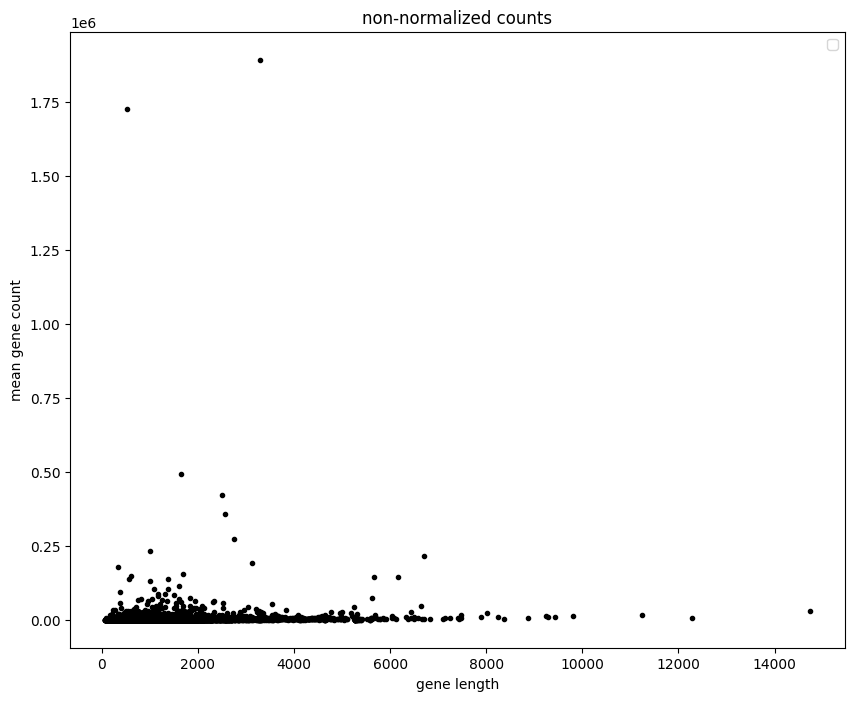

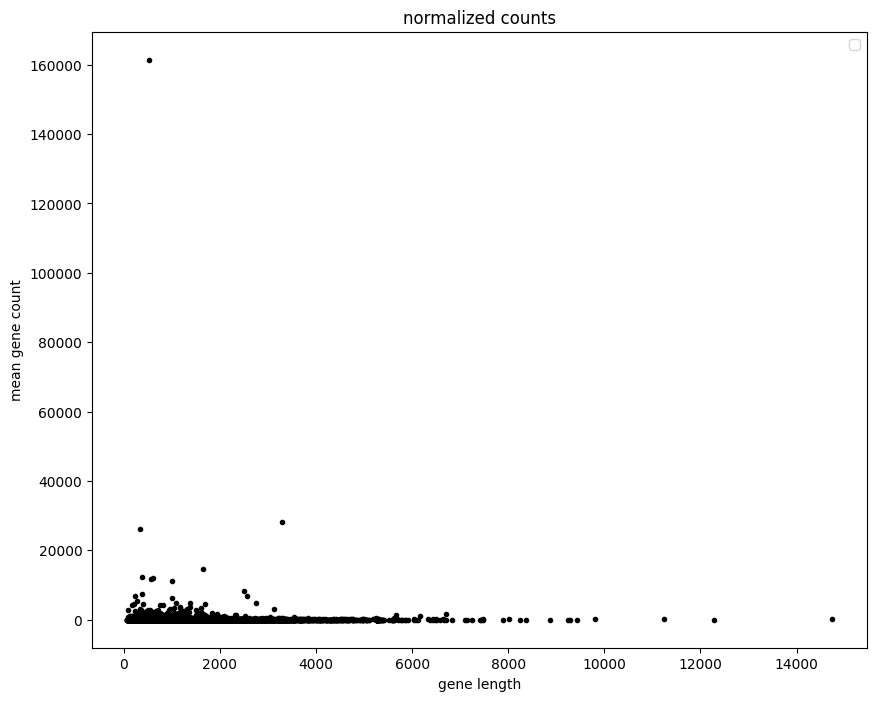

In [11]:
#normalized

plt.figure(figsize=(10,8))
plt.scatter(y=filtered_genes['gene_mean'], x=filtered_genes['gene_length'], color='k', marker='.')
plt.title('non-normalized counts')
plt.xlabel('gene length')
plt.ylabel('mean gene count')
plt.legend()

#not normalized
plt.figure(figsize=(10,8))
plt.scatter(y=TPM_MasterCount['gene_mean'], x=filtered_genes['gene_length'], color='k', marker='.')
plt.title('normalized counts')
plt.xlabel('gene length')
plt.ylabel('mean gene count')
plt.legend()

In [154]:
TPM_MasterCount

,MMY116_2c_r7,ASY59_4_r7,AFY98_1_r7,AFY98_2_r7,AFY57_r7,AFY101_2_r7,AFY102_r7,AFY074_r7,MMY116_2c_r8,ASY59_4_r8,...,AFY102_r8,AFY074_r8,MMY116_2c_r9,ASY59_4_r9,AFY98_1_r9,AFY98_2_r9,AFY57_r9,AFY101_2_r9,AFY102_r9,AFY074_r9
gene_id,,,,,,,,,,,,,,,,,,,,,
21S_rRNA,22644.982750,31905.830279,24368.314134,29882.449816,28217.473440,26734.825385,28102.714712,28215.616597,25749.432223,35010.294625,...,27425.407747,31528.327239,22008.196568,21949.390525,32491.611042,25696.151547,28109.873621,29420.178014,24322.800822,28088.631305
SCR1,170501.931373,181566.503001,144129.333292,189756.924502,152258.702597,148237.123449,161616.376142,164506.458755,185248.434731,197654.456895,...,148850.517026,155372.295745,149057.456119,139016.100047,157845.943479,143374.734049,152368.692488,156893.212135,160043.822227,165953.327222
15S_rRNA,11204.092112,18373.277065,12863.135022,15232.344184,15149.610053,12630.291561,15701.702783,16123.941188,13508.815990,18181.604896,...,14174.343426,15846.732972,9333.579998,10133.858460,15942.235398,12180.609519,14265.600907,16430.614718,12976.287661,14740.449193
Q0050,5970.232521,8409.384103,8390.551183,8237.687937,8575.432595,7455.641141,8001.548786,8240.624570,6898.227178,10225.037895,...,8226.371861,8694.116692,7622.223190,9114.314769,8609.337188,8622.928119,7606.528369,8219.604922,6503.889525,6912.924269
Q0055,5199.408311,7288.248979,6637.435585,7069.910792,6995.545993,6121.185905,6696.449420,6680.323188,5946.078605,8845.858607,...,6557.152974,7078.099693,5898.409040,7219.007394,7454.376701,7029.374581,6474.263250,6596.927517,5589.619116,6103.475422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOR225W,5.968260,3.306931,3.461630,3.490203,0.753601,1.933975,1.689102,0.324021,4.885278,3.007889,...,0.232303,2.014935,2.551218,3.125524,4.433096,2.952352,0.426861,0.655590,1.538063,0.931618
YFL015W-A,5.743042,2.196301,1.436903,4.566755,2.346117,4.785816,2.390239,2.185612,3.379752,2.570560,...,1.808020,2.090970,3.622881,3.755595,0.862572,1.225505,1.550393,0.907106,0.638441,1.795436
YHR093W,2.217714,0.715598,0.693587,3.922229,1.056964,1.073076,1.384510,0.681683,1.245790,1.914375,...,0.558543,0.990951,1.210673,1.680969,2.664702,1.508442,1.924375,1.313569,1.571682,1.199976


In [12]:
TPM_MasterCount.drop(columns=['gene_mean', 'gene_length'], inplace=True)

In [13]:
# PCA analysis #

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#transform the dataframe such that it can be used with the log-function

TPM_count_log = TPM_MasterCount.copy()
count_original_log = filtered_genes.copy()

TPM_count_log = np.log10(TPM_MasterCount + 1)
count_original_log = np.log10(filtered_genes + 1)

TPM_count_log = TPM_count_log.T

print('TPM_count_log:', TPM_count_log)


# creating Anndata #
X = TPM_count_log.values
obs = pd.DataFrame(index=TPM_count_log.index)
var = pd.DataFrame(index=TPM_count_log.columns) 

adata = ad.AnnData(X=X, obs=obs, var=var)

print('adata.obs:',adata.obs) # check if the Anndata is constructed correctly and that you find here the samples


TPM_count_log: gene_id       21S_rRNA      SCR1  15S_rRNA     Q0050     Q0055   YGL008C  \
MMY116_2c_r7  4.354991  5.231732  4.049415  3.776064  3.716037  3.714457   
ASY59_4_r7    4.503884  5.259038  4.264210  3.924816  3.862683  3.675924   
AFY98_1_r7    4.386843  5.158755  4.109381  3.923842  3.822066  3.706183   
AFY98_2_r7    4.475431  5.278200  4.182795  3.915858  3.849475  3.673958   
AFY57_r7      4.450534  5.182585  4.180430  3.933307  3.844884  3.691035   
AFY101_2_r7   4.427094  5.170960  4.101448  3.872543  3.786907  3.699508   
AFY102_r7     4.448764  5.208488  4.195974  3.903228  3.825909  3.680332   
AFY074_r7     4.450505  5.216186  4.207498  3.916013  3.824862  3.664176   
MMY116_2c_r8  4.410785  5.267757  4.130649  3.838800  3.774304  3.701932   
ASY59_4_r8    4.544208  5.295909  4.259656  4.009707  3.946789  3.674374   
AFY98_1_r8    4.541989  5.287340  4.284883  3.926947  3.870475  3.688431   
AFY98_2_r8    4.484080  5.233269  4.226863  3.964239  3.893847  3.661686 

In [89]:
TPM_count_log['YOR329W-A']

MMY116_2c_r7    0.179427
ASY59_4_r7      1.040503
AFY98_1_r7      1.147840
AFY98_2_r7      1.111365
AFY57_r7        1.073918
AFY101_2_r7     1.126787
AFY102_r7       1.240759
AFY074_r7       1.628366
MMY116_2c_r8    0.000000
ASY59_4_r8      1.156729
AFY98_1_r8      1.091444
AFY98_2_r8      1.151909
AFY57_r8        1.194561
AFY101_2_r8     1.030682
AFY102_r8       1.198229
AFY074_r8       1.510215
MMY116_2c_r9    0.000000
ASY59_4_r9      0.979119
AFY98_1_r9      1.127387
AFY98_2_r9      1.123670
AFY57_r9        1.116411
AFY101_2_r9     1.102974
AFY102_r9       1.216655
AFY074_r9       1.609982
Name: YOR329W-A, dtype: float64

In [109]:
#### PCA analysis ####

# do PCA with highly variable genes as features #

# defining highly variable genes via scanpy #
sc.pp.highly_variable_genes(adata,n_top_genes=500, flavor='seurat', inplace=True)


adata_hvg = adata[:, adata.var['highly_variable']].copy() #new data

# PCA
sc.pp.pca(adata_hvg, n_comps=23)

pca_coordinates = adata_hvg.obsm['X_pca']
#pca_loadings = adata_hvg.uns['pca']['components']
explained_variance = adata_hvg.uns['pca']['variance']
explained_variance_ratio = adata_hvg.uns['pca']['variance_ratio']
adata_hvg.uns['pca']

# create function, by variance to select highly variable genes, somehow I get better results with this approach #
"""
def select_HVG(df, num_genes=500):
    
    gene_variance = df.var(axis=1)
    top_genes = gene_variance.nlargest(num_genes).index

    return df.loc[top_genes]

highly_variable_genes = select_HVG(TPM_MasterCount, num_genes=500)"""

# check if there are stored HVG (from scanpy packages) ---> probably don't have to do this again if commented out above, but run the code again to make sure !!!
"""
adata.var["highly_variable"] = False  
adata.var.loc[highly_variable_genes.index, "highly_variable"] = True
adata.uns["hvg"] = highly_variable_genes.index.tolist()
adata_hvg = adata[:, adata.var["highly_variable"]].copy()
"""
sc.pp.pca(adata_hvg, n_comps=23)

pca_coordinates = adata_hvg.obsm['X_pca']
#pca_loadings = adata_hvg.uns['pca']['components']
explained_variance = adata_hvg.uns['pca']['variance']
explained_variance_ratio = adata_hvg.uns['pca']['variance_ratio']
adata_hvg.uns['pca']


pca1 = pca_coordinates[:,0]
pca2 = pca_coordinates[:,1]
pca3 =  pca_coordinates[:,2]
pca4 = pca_coordinates[:,3]

cum_sum_eigenvalues = np.cumsum(explained_variance_ratio) # to choose the number of PCA components
n_min = np.argmax(cum_sum_eigenvalues>0.99)
n_min

print('explained variance:',explained_variance)
print('explained_variance_ratio:',explained_variance_ratio)
print('cum sum eigenvalues:', cum_sum_eigenvalues)


explained variance: [2.35043526 2.07839322 0.78358009 0.6377388  0.45932353 0.41475889
 0.26138509 0.21405003 0.19882079 0.15784325 0.13753957 0.11842763
 0.11673664 0.09600593 0.08923444 0.08227876 0.0683534  0.06656298
 0.06442154 0.05988612 0.05546063 0.04552576 0.04060093]
explained_variance_ratio: [0.27339025 0.24174775 0.09114191 0.07417842 0.05342609 0.04824257
 0.03040294 0.02489717 0.02312579 0.01835949 0.01599788 0.01377488
 0.01357819 0.0111669  0.01037928 0.00957023 0.00795051 0.00774225
 0.00749317 0.00696564 0.00645089 0.00529532 0.00472249]
cum sum eigenvalues: [0.27339025 0.51513799 0.6062799  0.68045832 0.73388441 0.78212698
 0.81252992 0.83742709 0.86055288 0.87891237 0.89491025 0.90868513
 0.92226332 0.93343022 0.9438095  0.95337973 0.96133024 0.9690725
 0.97656567 0.98353131 0.9899822  0.99527751 1.        ]


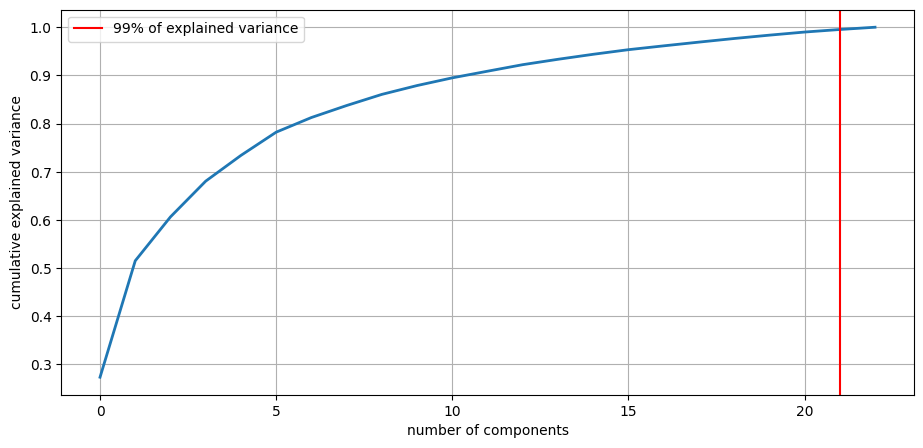

In [110]:
# plotting elbow plot to check how many pca components are needed # 

fig, ax = plt.subplots(figsize=(11, 5) )
plt.plot(np.cumsum(explained_variance_ratio), linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x = n_min, color = 'r', label = '99% of explained variance')
plt.legend()
plt.grid();

In [106]:
# color the pca component according to the replicates and also mutations

mutation_group = df_sorted[['Sample', 'Group']]

sample_group = []
for i in mutation_group['Group'].values:
    sample_group.append(i)

mutation_group


,Sample,Group
23,AFY074_r9,2x triple addition
15,AFY074_r8,2x triple addition
7,AFY074_r7,2x triple addition
19,AFY98_2_r9,double addition
18,AFY98_1_r9,double addition
17,ASY59_4_r9,double addition
10,AFY98_1_r8,double addition
9,ASY59_4_r8,double addition
11,AFY98_2_r8,double addition
3,AFY98_2_r7,double addition


In [99]:
print('pca1:',pca1)
print('pca2:',pca2)
print('sample_columns_3:',sample_columns_3)

pca1: [-1.2643787   1.1201478  -2.0419996   1.3570865  -0.7140103  -1.09195
 -0.15723962  0.04517341  1.0739204   3.61924     3.4077625   1.7322533
  0.15081422 -0.01810867 -0.18997431  1.8180311  -3.0540147  -2.9993906
 -0.41580838 -2.7867014  -0.40622848 -0.46857584  0.08493495  1.1990166 ]
pca2: [ 2.7546647   0.2823924   0.73697156  1.0233074  -0.5123724  -0.09295523
 -1.0660577  -2.164563    2.2248437   2.4260132   2.3856058   0.16646166
 -1.027952   -1.7298216  -2.4437664  -2.3686593   2.389908    0.93369985
  1.3664201   0.4304047  -0.65305996 -1.6630298  -1.8140304  -1.5844258 ]
sample_columns_3: ['MMY116_2c_r7', 'ASY59_4_r7', 'AFY98_1_r7', 'AFY98_2_r7', 'AFY57_r7', 'AFY101_2_r7', 'AFY102_r7', 'AFY074_r7', 'MMY116_2c_r8', 'ASY59_4_r8', 'AFY98_1_r8', 'AFY98_2_r8', 'AFY57_r8', 'AFY101_2_r8', 'AFY102_r8', 'AFY074_r8', 'MMY116_2c_r9', 'ASY59_4_r9', 'AFY98_1_r9', 'AFY98_2_r9', 'AFY57_r9', 'AFY101_2_r9', 'AFY102_r9', 'AFY074_r9']


In [100]:
adata_hvg

AnnData object with n_obs × n_vars = 24 × 1000
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [101]:
adata_hvg.obs

""
MMY116_2c_r7
ASY59_4_r7
AFY98_1_r7
AFY98_2_r7
AFY57_r7
AFY101_2_r7
AFY102_r7
AFY074_r7
MMY116_2c_r8
ASY59_4_r8


In [102]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Sample metadata (replace with actual DataFrame if loaded from a file)
metadata = pd.DataFrame({
    "Sample": [
        "AFY074_r9", "AFY074_r8", "AFY074_r7", "AFY98_2_r9", "AFY98_1_r9", "ASY59_4_r9",
        "AFY98_1_r8", "ASY59_4_r8", "AFY98_2_r8", "AFY98_2_r7", "AFY98_1_r7", "ASY59_4_r7",
        "AFY102_r7", "AFY101_2_r7", "AFY102_r9", "AFY57_r8", "AFY101_2_r8", "AFY102_r8",
        "AFY57_r7", "AFY57_r9", "AFY101_2_r9", "MMY116_2c_r9", "MMY116_2c_r8", "MMY116_2c_r7"
    ],
    "Group": [
        "2x triple addition", "2x triple addition", "2x triple addition", "double addition",
        "double addition", "double addition", "double addition", "double addition", "double addition",
        "double addition", "double addition", "double addition", "triple addition", "triple addition",
        "triple addition", "triple addition", "triple addition", "triple addition", "triple addition",
        "triple addition", "triple addition", "wild type", "wild type", "wild type"
    ]

})


metadata.set_index("Sample", inplace=True)

adata_hvg.obs = adata_hvg.obs.join(metadata, how="left")

# Extract replicate info (r7, r8, r9) from sample names ---> change of course for spec
adata_hvg.obs["Replicate"] = adata_hvg.obs.index.to_series().str.extract(r"_(r\d+)")[0]
adata_hvg.obs



,Group,Replicate
MMY116_2c_r7,wild type,r7
ASY59_4_r7,double addition,r7
AFY98_1_r7,double addition,r7
AFY98_2_r7,double addition,r7
AFY57_r7,triple addition,r7
AFY101_2_r7,triple addition,r7
AFY102_r7,triple addition,r7
AFY074_r7,2x triple addition,r7
MMY116_2c_r8,wild type,r8
ASY59_4_r8,double addition,r8


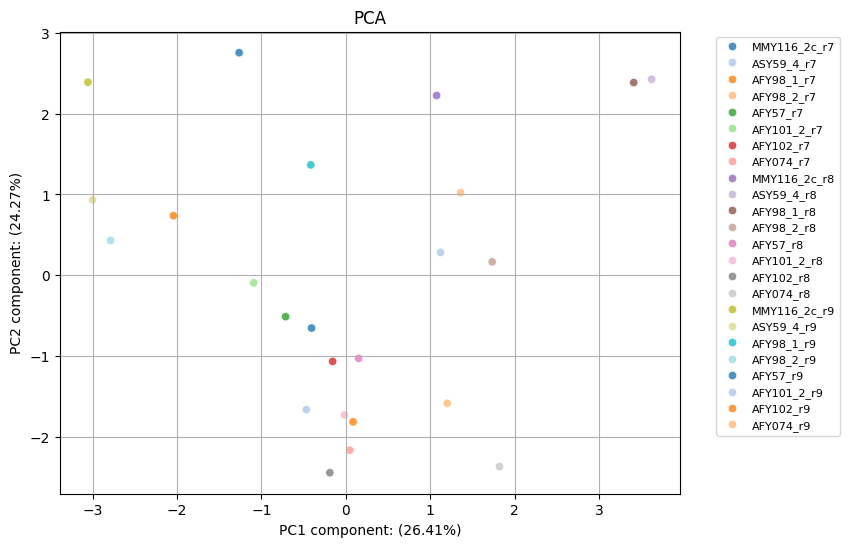

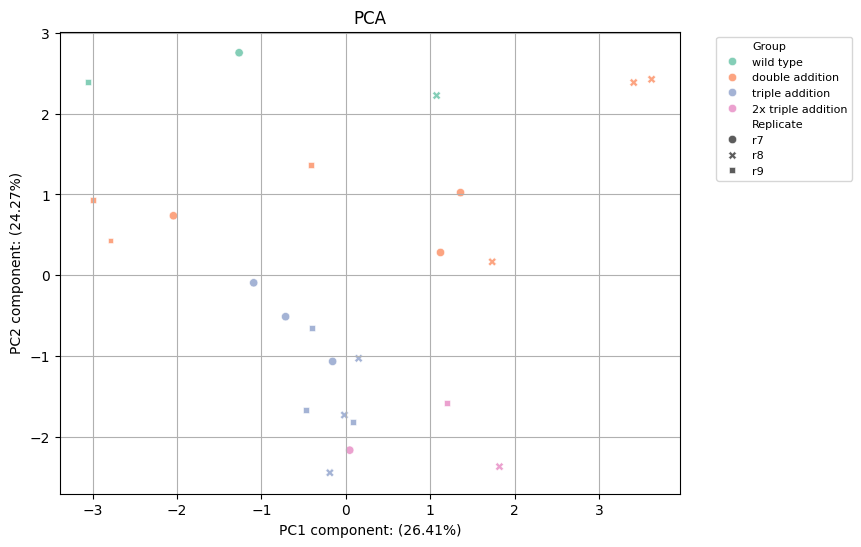

PCA analysis component 2 and 3


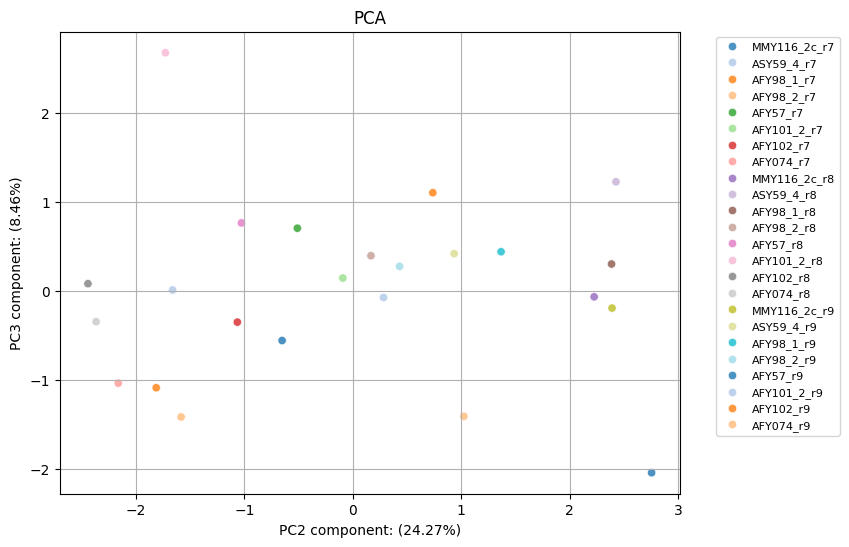

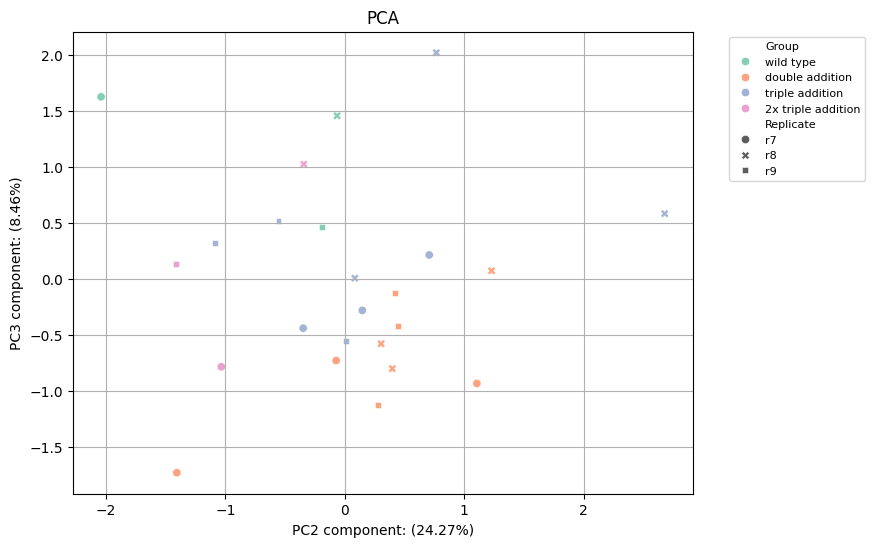

In [103]:
# plotting #

# component 1 vs component 2 

#coloring all samples

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca1,  # PC1
    y=pca2,  # PC2
    hue=adata_hvg.obs.index,  # Color by Sample
    palette="tab20",  # Color palette
    alpha=0.8  # Transparency
)
plt.xlabel(f"PC1 component: ({explained_variance_ratio[0]:.2%})")
plt.ylabel(f"PC2 component: ({explained_variance_ratio[1]:.2%})")
plt.title("PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid()
plt.show()

# coloring according to mutation group and samples

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca1,  # PC1
    y=pca2,  # PC2
    hue=adata_hvg.obs["Group"],  # Color by Group
    style=adata_hvg.obs["Replicate"], 
    palette="Set2",  # Distinct colors for groups
    alpha=0.8
)
plt.xlabel(f"PC1 component: ({explained_variance_ratio[0]:.2%})")
plt.ylabel(f"PC2 component: ({explained_variance_ratio[1]:.2%})")
plt.title("PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid()
plt.show()


# component 2 vs component 3

print('PCA analysis component 2 and 3')

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca2,  # PC2
    y=pca3,  # PC3
    hue=adata_hvg.obs.index,  # Color by Sample
    palette="tab20",  # Color palette
    alpha=0.8  # Transparency
)
plt.xlabel(f"PC2 component: ({explained_variance_ratio[1]:.2%})")
plt.ylabel(f"PC3 component: ({explained_variance_ratio[2]:.2%})")
plt.title("PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid()
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca3,  # PC2
    y=pca4,  # PC3
    hue=adata_hvg.obs["Group"],  # Color by Group
    style=adata_hvg.obs["Replicate"],  
    palette="Set2",  # Distinct colors for groups
    alpha=0.8
)
plt.xlabel(f"PC2 component: ({explained_variance_ratio[1]:.2%})")
plt.ylabel(f"PC3 component: ({explained_variance_ratio[2]:.2%})")
plt.title("PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid()
plt.show()


In [24]:
##### ---------------------------------- DE genes analysis ---------------------------------- #####

### Using pyDESEq2 ---> This package is a python implementation of the DESeq2 method [LHA14]
#  for differential expression analysis (DEA) 
# with bulk RNA-seq data, originally in R. It aims to facilitate DEA experiments for python users. ###

# removing genes with very low counts...

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [3]:
!pip install pydeseq2 # issues to install in terminal, so installing directly in juüyter notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 797.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 854.2 kB/s eta 0:00:0000:0100:02
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [25]:
count = filtered_genes.drop(columns=['gene_length', 'gene_mean'])

In [26]:
counts = count.T # genes need to be the columns and samples the rows

In [27]:
counts

gene_id,21S_rRNA,SCR1,15S_rRNA,Q0050,Q0055,YGL008C,YGR192C,YNR016C,YLR249W,snR17a,...,YJL026C-A,YLR379W,YLR347W-A,YBR019C,YAL016C-A,YOR225W,YFL015W-A,YHR093W,YOR203W,YLR154W-C
MMY116_2c_r7,2084300,2485426,515939,417638,372428,398851,272780,295540,278423,335487,...,34,32,24,38,36,55,51,34,13,20
ASY59_4_r7,2409119,2171237,694078,482584,428264,299413,263979,233647,201443,216942,...,27,31,39,17,23,25,16,9,9,30
AFY98_1_r7,2109305,1975830,557050,551982,447110,368011,293781,266403,269736,209105,...,15,13,17,24,12,30,12,10,6,11
AFY98_2_r7,1966829,1978023,501592,412075,362130,259816,210074,215639,167543,202505,...,11,12,21,27,20,23,29,43,5,17
AFY57_r7,2243887,1917557,602723,518274,432917,326497,279049,251518,247575,201595,...,27,18,24,30,12,6,18,14,5,4
AFY101_2_r7,1794912,1576181,424241,380427,319817,281084,223981,218962,206310,195469,...,10,10,11,24,9,13,31,12,5,8
AFY102_r7,1827925,1664864,510964,395553,338965,260556,220576,216851,191055,184502,...,13,16,10,19,15,11,15,15,5,15
AFY074_r7,1739482,1606189,497319,386110,320500,237937,203670,204663,176173,176056,...,8,18,20,16,8,2,13,7,76,15
MMY116_2c_r8,1737263,1979410,455983,353717,312197,284049,226256,206559,188354,214268,...,12,25,15,19,20,33,22,14,5,12
ASY59_4_r8,1976315,1767056,513483,438678,388598,223045,175752,165230,150524,198890,...,13,7,11,11,12,17,14,18,9,18


In [28]:
metadata = pd.DataFrame(zip(counts.index, ['WT', 'double_addition', 'double_addition', 'double_addition', 'triple_addition', 'triple_addition','triple_addition', '2x_triple_addition', 'WT', 'double_addition', 'double_addition', 'double_addition', 'triple_addition', 'triple_addition','triple_addition', '2x_triple_addition','WT', 'double_addition', 'double_addition', 'double_addition', 'triple_addition', 'triple_addition','triple_addition', '2x_triple_addition'], ['r7', 'r7', 'r7', 'r7', 'r7', 'r7', 'r7', 'r7', 'r8', 'r8', 'r8','r8', 'r8', 'r8', 'r8','r8', 'r9', 'r9', 'r9', 'r9', 'r9', 'r9', 'r9', 'r9']), columns = ['Sample', 'Condition', 'Replicate'])

In [29]:
metadata.columns

Index(['Sample', 'Condition', 'Replicate'], dtype='object')

In [30]:
metadata

,Sample,Condition,Replicate
0,MMY116_2c_r7,WT,r7
1,ASY59_4_r7,double_addition,r7
2,AFY98_1_r7,double_addition,r7
3,AFY98_2_r7,double_addition,r7
4,AFY57_r7,triple_addition,r7
5,AFY101_2_r7,triple_addition,r7
6,AFY102_r7,triple_addition,r7
7,AFY074_r7,2x_triple_addition,r7
8,MMY116_2c_r8,WT,r8
9,ASY59_4_r8,double_addition,r8


In [31]:
metadata = metadata.set_index('Sample')

In [32]:
metadata

,Condition,Replicate
Sample,,
MMY116_2c_r7,WT,r7
ASY59_4_r7,double_addition,r7
AFY98_1_r7,double_addition,r7
AFY98_2_r7,double_addition,r7
AFY57_r7,triple_addition,r7
AFY101_2_r7,triple_addition,r7
AFY102_r7,triple_addition,r7
AFY074_r7,2x_triple_addition,r7
MMY116_2c_r8,WT,r8


In [85]:
dds.obs

,Condition,Replicate
Sample,,
MMY116_2c_r7,WT,r7
ASY59_4_r7,double-addition,r7
AFY98_1_r7,double-addition,r7
AFY98_2_r7,double-addition,r7
AFY57_r7,triple-addition,r7
AFY101_2_r7,triple-addition,r7
AFY102_r7,triple-addition,r7
AFY074_r7,2x-triple-addition,r7
MMY116_2c_r8,WT,r8


In [34]:
# having now the count table (counts) and metadata (metadata) table we can do differential expression

from pydeseq2.dds import DeseqDataSet

# ordering the metadataConditions column such that the control group is the first: Here = WT.

metadata['Condition'] = pd.Categorical(metadata['Condition'],
                                       categories=["WT", "double_addition", "triple_addition", "2x_triple_addition"],
                                       ordered=True)
# creating DeseqDataSet object

dds = DeseqDataSet(counts=counts,
             metadata=metadata,
             design_factors=["Replicate","Condition"])


dds.deseq2()


/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.29 seconds.

Fitting dispersion trend curve...
... done in 0.16 seconds.

Fitting MAP dispersions...
... done in 1.46 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [35]:
dds.obs['Condition']

Sample
MMY116_2c_r7                    WT
ASY59_4_r7         double-addition
AFY98_1_r7         double-addition
AFY98_2_r7         double-addition
AFY57_r7           triple-addition
AFY101_2_r7        triple-addition
AFY102_r7          triple-addition
AFY074_r7       2x-triple-addition
MMY116_2c_r8                    WT
ASY59_4_r8         double-addition
AFY98_1_r8         double-addition
AFY98_2_r8         double-addition
AFY57_r8           triple-addition
AFY101_2_r8        triple-addition
AFY102_r8          triple-addition
AFY074_r8       2x-triple-addition
MMY116_2c_r9                    WT
ASY59_4_r9         double-addition
AFY98_1_r9         double-addition
AFY98_2_r9         double-addition
AFY57_r9           triple-addition
AFY101_2_r9        triple-addition
AFY102_r9          triple-addition
AFY074_r9       2x-triple-addition
Name: Condition, dtype: object

In [36]:
#stat_res = DeseqStats(dds, contrast = ('Condition','XX','YY'))   

stat_res_double_addition = DeseqStats(dds, contrast=('Condition', 'WT', 'double-addition')) # comparing double addition with wild-type
stat_res_double_addition.summary()

stat_res_triple_addition = DeseqStats(dds, contrast = ('Condition', 'WT', 'triple-addition')) # comparing triple addition with wild-type
stat_res_triple_addition.summary()

stat_res_2x_triple_addition = DeseqStats(dds, contrast = ('Condition', 'WT', '2x-triple-addition')) # comparing 2x triple addition with wild-type
stat_res_2x_triple_addition.summary()

Running Wald tests...
... done in 0.40 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: Condition WT vs double-addition
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
gene_id                                                                 
21S_rRNA   1.897242e+06       -0.340258  0.133737 -2.544240  0.010952   
SCR1       1.744925e+06       -0.006513  0.130370 -0.049958  0.960156   
15S_rRNA   4.933482e+05       -0.450353  0.191395 -2.353001  0.018623   
Q0050      4.183439e+05       -0.366466  0.090803 -4.035827  0.000054   
Q0055      3.570832e+05       -0.385844  0.091292 -4.226478  0.000024   
...                 ...             ...       ...       ...       ...   
YOR225W    1.639348e+01        0.436658  0.390860  1.117172  0.263921   
YFL015W-A  1.672196e+01        0.588868  0.472797  1.245499  0.212948   
YHR093W    1.636782e+01       -0.282896  0.506914 -0.558075  0.576793   
YOR203W    1.554164e+01        0.263376  0.414579  0.635286  0.525242   
YLR154W-C  1.404003e+01       -0.365500  0.520449 -0.7

... done in 0.34 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: Condition WT vs triple-addition
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
gene_id                                                                 
21S_rRNA   1.897242e+06       -0.141375  0.133737 -1.057114  0.290460   
SCR1       1.744925e+06        0.211807  0.130370  1.624658  0.104235   
15S_rRNA   4.933482e+05       -0.260312  0.191395 -1.360073  0.173807   
Q0050      4.183439e+05       -0.141822  0.090804 -1.561855  0.118322   
Q0055      3.570832e+05       -0.122040  0.091293 -1.336797  0.181289   
...                 ...             ...       ...       ...       ...   
YOR225W    1.639348e+01        1.898092  0.412534  4.601054  0.000004   
YFL015W-A  1.672196e+01        1.400583  0.482561  2.902395  0.003703   
YHR093W    1.636782e+01        0.695857  0.516007  1.348541  0.177485   
YOR203W    1.554164e+01        0.765816  0.428844  1.785767  0.074137   
YLR154W-C  1.404003e+01       -0.200628  0.522302 -0.3

... done in 0.36 seconds.



In [44]:
res_double_addition = stat_res_double_addition.results_df

res_triple_addition = stat_res_triple_addition.results_df

res_2x_triple_addition = stat_res_2x_triple_addition.results_df


In [61]:
res_2x_triple_addition['log2FoldChange'].sort_values() # check the outliers

gene_id
YOR329W-A   -7.502520
YOR202W     -4.680797
YEL021W     -3.214840
YOR203W     -3.213054
YDR007W     -2.208744
               ...   
YOR226C      2.010463
YKL120W      2.022527
YOR225W      2.119296
YFL053W      2.637890
YGL009C      2.976072
Name: log2FoldChange, Length: 5863, dtype: float64

In [66]:
outlier_YOR329W_A = Data3[Data3['gene_id']== 'YOR329W-A']

outlier_YOR329W_A.max()

gene_id                                                     YOR329W-A
MMY116_2c_r7                                                        3
ASY59_4_r7                                                         48
AFY98_1_r7                                                         72
AFY98_2_r7                                                         50
AFY57_r7                                                           55
AFY101_2_r7                                                        53
AFY102_r7                                                          68
AFY074_r7                                                         163
MMY116_2c_r8                                                        0
ASY59_4_r8                                                         48
AFY98_1_r8                                                         46
AFY98_2_r8                                                         50
AFY57_r8                                                           82
AFY101_2_r8         

In [56]:
# there appears to be a conflict with matplotlib version: 'ColormapRegistry' object has no attribute 'get_cmap'. 
#  

pip install matplotlib==3.6.2 


SyntaxError: invalid syntax (2108754270.py, line 4)

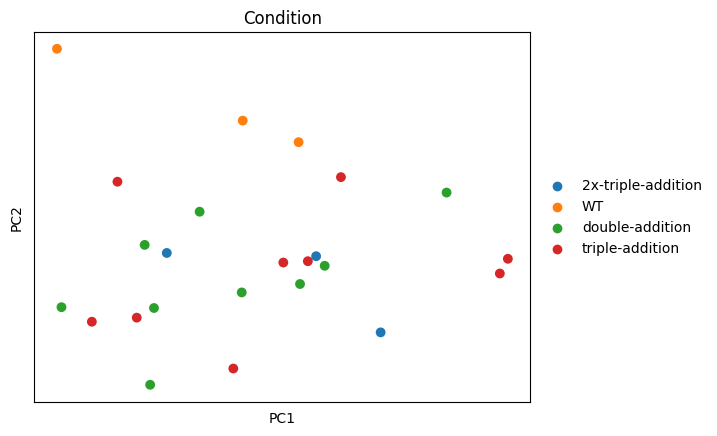

In [37]:
# create again pca ... ? just following the tutorial here

import scanpy as sc

sc.tl.pca(dds)

sc.pl.pca(dds, color='Condition', size=200) # this is so bad ?! ...........

In [47]:
# downstream analysis ----> need to install this somehow. Or maye

dds

AnnData object with n_obs × n_vars = 24 × 5863
    obs: 'Condition', 'Replicate'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks'

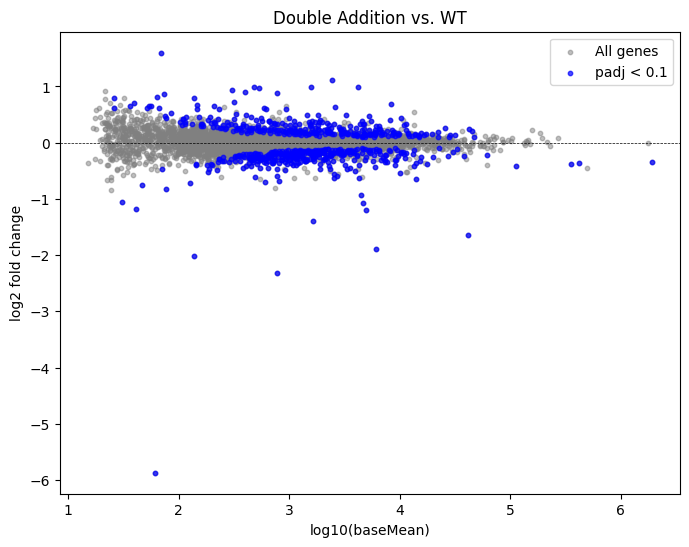

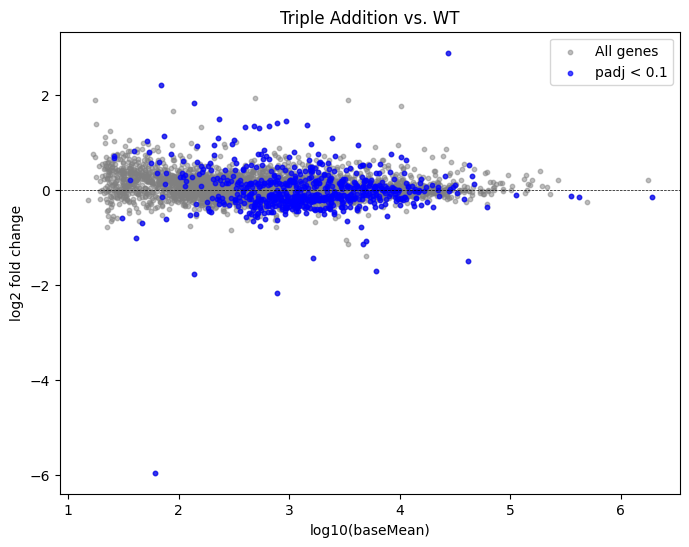

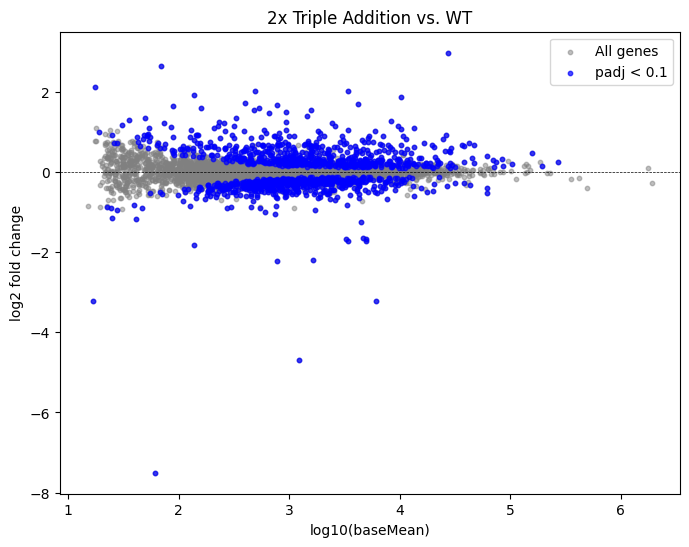

In [59]:
# plotting the results

plt.figure(figsize=(8,6))

plt.scatter(np.log10(res_double_addition['baseMean'] +1), res_double_addition['log2FoldChange'], color='gray', alpha=0.5, s=10, label='All genes')

#adding significant genes with padj < 0.1 as blue scatterdots
sig = res_double_addition['padj'] < 0.1
plt.scatter(np.log10(res_double_addition.loc[sig,'baseMean'] + 1),
            res_double_addition.loc[sig,'log2FoldChange'],
            color='blue', alpha=0.7, s=10, label='padj < 0.1')

plt.xlabel('log10(baseMean)')
plt.ylabel('log2 fold change')
plt.title('Double Addition vs. WT')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

plt.scatter(np.log10(res_triple_addition['baseMean'] +1), res_triple_addition['log2FoldChange'], color='gray', alpha=0.5, s=10, label='All genes')

#adding significant genes with padj < 0.1 as blue scatterdots
sig = res_double_addition['padj'] < 0.1
plt.scatter(np.log10(res_triple_addition.loc[sig,'baseMean'] + 1),
            res_triple_addition.loc[sig,'log2FoldChange'],
            color='blue', alpha=0.7, s=10, label='padj < 0.1')

plt.xlabel('log10(baseMean)')
plt.ylabel('log2 fold change')
plt.title('Triple Addition vs. WT')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

plt.scatter(np.log10(res_2x_triple_addition['baseMean'] +1), res_2x_triple_addition['log2FoldChange'], color='gray', alpha=0.5, s=10, label='All genes')

#adding significant genes with padj < 0.1 as blue scatterdots
sig = res_2x_triple_addition['padj'] < 0.1
plt.scatter(np.log10(res_2x_triple_addition.loc[sig,'baseMean'] + 1),
            res_2x_triple_addition.loc[sig,'log2FoldChange'],
            color='blue', alpha=0.7, s=10, label='padj < 0.1')

plt.xlabel('log10(baseMean)')
plt.ylabel('log2 fold change')
plt.title('2x Triple Addition vs. WT')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()